# Midterm
Konvicny Martin

In [242]:
import json
import requests
import pandas as pd
import datetime

In [180]:
payload = '{"cuni":"66805807"}'
r = requests.post('https://ies-midterm.soulution.rocks/login',payload)

In [181]:
r

<Response [200]>

In [182]:
outcome = json.loads(r.text)
outcome

{'data': {'personal_code': '1f3cf29a',
  'dataset_ids': ['5aa21103e8',
   'f894683be9',
   '24f88cb68c',
   '775352ba11',
   '86c214b421']},
 'message': 'Hello, Konvičný Martin! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [183]:
print(outcome['data']['personal_code'])

1f3cf29a


In [184]:
codes = outcome['data']['dataset_ids']
print(codes)

['5aa21103e8', 'f894683be9', '24f88cb68c', '775352ba11', '86c214b421']


In [186]:
dataset = {}
n = 10
for data_id in codes:
    r = requests.get(url=f'https://ies-midterm.soulution.rocks/data/{data_id}')
    i = 0
    while r.status_code !=200:  
        r=requests.get(url=f'https://ies-midterm.soulution.rocks/data/{data_id}')
    d=r.json()['data']
    ticker = d['company']
    data = pd.DataFrame(d['data']).set_index('Date')
    data.index = pd.to_datetime(data.index)
    
    dataset[ticker] = data

In [187]:
    ticker = d['company']
    data = pd.DataFrame(d['data']).set_index('Date')
    data.index = pd.to_datetime(data.index)
    
    dataset[ticker] = data

In [198]:
df = pd.concat(dataset)
print(df)

                               Open                High                 Low  \
     Date                                                                     
BME  2019-01-02  36.189998626708984  37.810001373291016  36.040000915527344   
     2019-01-03   36.95000076293945                37.5  36.029998779296875   
     2019-01-04   36.45000076293945   37.79999923706055   36.15999984741211   
     2019-01-07                37.5   38.59000015258789                37.5   
     2019-01-08               39.75               39.75  38.130001068115234   
...                             ...                 ...                 ...   
TSCO 2020-11-17   132.0800018310547   134.2100067138672   131.1199951171875   
     2020-11-18               132.0  132.55999755859375  128.10000610351562   
     2020-11-19   128.4600067138672   131.7899932861328               128.0   
     2020-11-20   130.0500030517578  131.39999389648438   128.4199981689453   
     NaT                        NaN                 

In [199]:
df.dropna(how='all',inplace = True)
print(df)

                               Open                High                 Low  \
     Date                                                                     
BME  2019-01-02  36.189998626708984  37.810001373291016  36.040000915527344   
     2019-01-03   36.95000076293945                37.5  36.029998779296875   
     2019-01-04   36.45000076293945   37.79999923706055   36.15999984741211   
     2019-01-07                37.5   38.59000015258789                37.5   
     2019-01-08               39.75               39.75  38.130001068115234   
...                             ...                 ...                 ...   
TSCO 2020-11-16  131.97000122070312  133.13999938964844  130.97999572753906   
     2020-11-17   132.0800018310547   134.2100067138672   131.1199951171875   
     2020-11-18               132.0  132.55999755859375  128.10000610351562   
     2020-11-19   128.4600067138672   131.7899932861328               128.0   
     2020-11-20   130.0500030517578  131.39999389648

In [200]:
df = df.apply(lambda x: pd.to_numeric(x))
print(df)

                       Open        High         Low       Close   Adj.Close  \
     Date                                                                     
BME  2019-01-02   36.189999   37.810001   36.040001   37.630001   33.530544   
     2019-01-03   36.950001   37.500000   36.029999   36.430000   32.461266   
     2019-01-04   36.450001   37.799999   36.160000   37.320000   33.254318   
     2019-01-07   37.500000   38.590000   37.500000   38.020000   33.878063   
     2019-01-08   39.750000   39.750000   38.130001   38.430000   34.243389   
...                     ...         ...         ...         ...         ...   
TSCO 2020-11-16  131.970001  133.139999  130.979996  132.820007  132.415222   
     2020-11-17  132.080002  134.210007  131.119995  131.679993  131.278671   
     2020-11-18  132.000000  132.559998  128.100006  128.419998  128.028625   
     2020-11-19  128.460007  131.789993  128.000000  131.250000  130.849991   
     2020-11-20  130.050003  131.399994  128.419998 

In [201]:
df.index.names = ['Ticker','Date']
print(df)

                         Open        High         Low       Close   Adj.Close  \
Ticker Date                                                                     
BME    2019-01-02   36.189999   37.810001   36.040001   37.630001   33.530544   
       2019-01-03   36.950001   37.500000   36.029999   36.430000   32.461266   
       2019-01-04   36.450001   37.799999   36.160000   37.320000   33.254318   
       2019-01-07   37.500000   38.590000   37.500000   38.020000   33.878063   
       2019-01-08   39.750000   39.750000   38.130001   38.430000   34.243389   
...                       ...         ...         ...         ...         ...   
TSCO   2020-11-16  131.970001  133.139999  130.979996  132.820007  132.415222   
       2020-11-17  132.080002  134.210007  131.119995  131.679993  131.278671   
       2020-11-18  132.000000  132.559998  128.100006  128.419998  128.028625   
       2020-11-19  128.460007  131.789993  128.000000  131.250000  130.849991   
       2020-11-20  130.05000

In [215]:
print(df.reset_index('Date')['Date'].groupby('Ticker').min())
print(df.reset_index('Date')['Date'].groupby('Ticker').max())

Ticker
BME    2019-01-02
PSN    2019-05-08
RTO    2020-01-24
SMIN   2019-01-02
TSCO   2019-01-02
Name: Date, dtype: datetime64[ns]
Ticker
BME    2020-11-20
PSN    2020-11-20
RTO    2020-01-24
SMIN   2020-11-20
TSCO   2020-11-20
Name: Date, dtype: datetime64[ns]


Yes. It is from 2019/01/02 to 2020/11/20.

In [216]:
print(df.groupby('Ticker')['Adj.Close'].max())
print(df.groupby('Ticker')['Adj.Close'].min())

Ticker
BME       46.650002
RTO     1865.000000
PSN       45.029999
SMIN      39.713108
TSCO     154.158752
Name: Adj.Close, dtype: float64
Ticker
BME       26.664894
RTO     1865.000000
PSN       25.309999
SMIN      20.771763
TSCO      66.763199
Name: Adj.Close, dtype: float64


In [205]:
df.groupby('Ticker')['Volume'].idxmax()

Ticker
BME      (BME, 2020-03-23 00:00:00)
RTO      (RTO, 2020-01-24 00:00:00)
PSN      (PSN, 2019-05-08 00:00:00)
SMIN    (SMIN, 2020-04-16 00:00:00)
TSCO    (TSCO, 2019-01-31 00:00:00)
Name: Volume, dtype: object

In [206]:
df.groupby('Ticker')['Volume'].sum()

Ticker
BME      18166500
RTO             0
PSN     168647400
SMIN     29874000
TSCO    682972700
Name: Volume, dtype: int64

<AxesSubplot:xlabel='Date'>

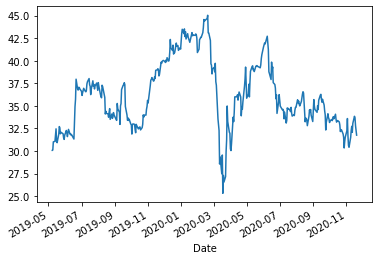

In [219]:
df.loc['PSN',:]['Adj.Close'].plot()

In [227]:
df['lret'] = df['Adj.Close'].pct_change()
print(df)

                         Open        High         Low       Close   Adj.Close  \
Ticker Date                                                                     
BME    2019-01-02   36.189999   37.810001   36.040001   37.630001   33.530544   
       2019-01-03   36.950001   37.500000   36.029999   36.430000   32.461266   
       2019-01-04   36.450001   37.799999   36.160000   37.320000   33.254318   
       2019-01-07   37.500000   38.590000   37.500000   38.020000   33.878063   
       2019-01-08   39.750000   39.750000   38.130001   38.430000   34.243389   
...                       ...         ...         ...         ...         ...   
TSCO   2020-11-16  131.970001  133.139999  130.979996  132.820007  132.415222   
       2020-11-17  132.080002  134.210007  131.119995  131.679993  131.278671   
       2020-11-18  132.000000  132.559998  128.100006  128.419998  128.028625   
       2020-11-19  128.460007  131.789993  128.000000  131.250000  130.849991   
       2020-11-20  130.05000

In [229]:
print(df.groupby('Ticker')['lret'].idxmax())
print(df.groupby('Ticker')['lret'].idxmin())

Ticker
BME      (BME, 2020-03-25 00:00:00)
RTO      (RTO, 2020-01-24 00:00:00)
PSN      (PSN, 2020-03-26 00:00:00)
SMIN    (SMIN, 2019-01-02 00:00:00)
TSCO    (TSCO, 2019-01-02 00:00:00)
Name: lret, dtype: object
Ticker
BME      (BME, 2020-03-12 00:00:00)
RTO      (RTO, 2020-01-24 00:00:00)
PSN      (PSN, 2019-05-08 00:00:00)
SMIN    (SMIN, 2020-03-12 00:00:00)
TSCO    (TSCO, 2020-03-09 00:00:00)
Name: lret, dtype: object


In [230]:
print(df.groupby('Ticker')['lret'].max())
print(df.groupby('Ticker')['lret'].min())

Ticker
BME      0.149523
RTO     39.809627
PSN      0.119718
SMIN     0.174806
TSCO     1.098692
Name: lret, dtype: float64
Ticker
BME     -0.111678
RTO     39.809627
PSN     -0.983877
SMIN    -0.162536
TSCO    -0.116310
Name: lret, dtype: float64


<AxesSubplot:xlabel='Date'>

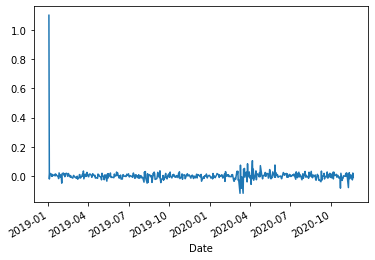

In [239]:
# 2019/01/02 : TSCO
df.loc['TSCO',:]['lret'].plot()

In [240]:
print(df.reset_index('Date'))

             Date        Open        High         Low       Close   Adj.Close  \
Ticker                                                                          
BME    2019-01-02   36.189999   37.810001   36.040001   37.630001   33.530544   
BME    2019-01-03   36.950001   37.500000   36.029999   36.430000   32.461266   
BME    2019-01-04   36.450001   37.799999   36.160000   37.320000   33.254318   
BME    2019-01-07   37.500000   38.590000   37.500000   38.020000   33.878063   
BME    2019-01-08   39.750000   39.750000   38.130001   38.430000   34.243389   
...           ...         ...         ...         ...         ...         ...   
TSCO   2020-11-16  131.970001  133.139999  130.979996  132.820007  132.415222   
TSCO   2020-11-17  132.080002  134.210007  131.119995  131.679993  131.278671   
TSCO   2020-11-18  132.000000  132.559998  128.100006  128.419998  128.028625   
TSCO   2020-11-19  128.460007  131.789993  128.000000  131.250000  130.849991   
TSCO   2020-11-20  130.05000

In [250]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y %m %d')

KeyError: 'Date'

In [246]:
df['Month'] = df['Date'].astype(str).str[:6]

monthly_total = df.groupby('month').sum().drop('date', axis='columns')

KeyError: 'Date'